<div align="right"><img src='images/zestimates.png'/>

<h1 style="color:#009eff;font:luminary;text-align:center;"><i>Where did Zillow go wrong? </i></h1>
    
<h2 style="color:#009eff;text-align:center;"> Predicting errors on Zestimates - December 2, 2022 </h2>


<h1 style="color:#009eff;">Task at hand</h1> 

### Using several data science methods detailed below, our group is estimating the errors zillow's price guesses for houses which sold in 2017.
#### Data Science Methods include:
- splitting model into appropriate groups when recognizing their existence
- regression modeling
- feature engineering using clusters

<h1 style="color:#009eff;">Project Goal</h1> 

### Zillow guessed incorrectly regarding the actual prices which houses sold for throughout the 2017 year. Those guesses are termed "zestimates." By estimating the errors on the model, we can present advice about which model features should be incorporated into or modified in Zillow's price determining model.

<h1 style="color:#009eff;">Plan of action</h1>

### Aqcuire and prepare
1. Acquire'zillow 2017' data from the public facing CodeUp database. Transform the data to a Pandas dataframe for manipulating using Jupyter Notebook.
2. Prepare the data for exploration and analysis. Find out if there are some values missing and find a way to handle those missing values.
3. Change the data types if needed
4. Find if there are features which can be created to simplify the exploration process.
5. Determine which observations are outliers and handle them.
6. Create a data dictionary.
7. Split the data into 3 data sets: train, validate and test data (56%, 24%, and 20% respectively)

### Explore and pre-process
1. Explore the train data set through visualizations and statistical tests. 
2. Determine which variables have statistically significant relationships with zestimates errors. 
2. Make the exploration summary and document the main takeaways.
3. Impute the missing values if needed.
4. Pick the features which can help to build a good prediction model.
5. Identify if new features must be created to improve the model's accuracy.
6. Encode the categorical variables.
7. Split dataframe into segments if those segments represent different populations.
8. Split the target variable from the data sets.
9. Scale the data prior to modeling.

### Explore clusters to add features to model
1. Create clusters using based on KMeans algorithm.
2. Determine if any or all clusters crafted add useful information to model by running them on our models.

### Build a regression model
1. Pick the regression algorithms for creating the prediction model.
2. Create the models and evaluate regressors using **Adjusted R-Squared** score on the train data set.
3. Create models based on obtained clusters.
4. Split data sets based on the location and create regression models.
4. Find out which of data splits provides best results.
5. Make predictions for the test data set.
6. Evaluate the results.

*Draw conclusions*

<h1 style="color:#009eff;">This notebook's required library and module imports</h1>

In [ ]:
# removed random seed

In [38]:
# standard anaconda libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

#custom project modules
import src.wrangle as wr
import src.evaluate as ev
import src.clusters as cl

pd.options.display.float_format = '{:,.3f}'.format
# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Data Dictionary


| Feature | Definition | Manipulations applied|Data Type|
|--------|-----------|-----------|-----------|
||
|||**Categorical Data**
||
|*county_name*| Identifying Regions: counties and LA city proper  | Used fips and city ID to determine 'LA', 'Orange', 'Ventura' counties and 'LA_city' proper| category
|||**Numerical Data**
||
|*beds*|  Number of bedrooms | Changed the type into integer| integer
|*bath*|  Number of bathrooms | Half-bathrooms were turned into whole number, changed the type intoto integer| integer
|*bed_bath_ratio*|  The ratio of bedrooms to bathrooms | Divided bedroom number by bathroom number | float
|*lot_sqft*| Size of the plot of land the house sits on | Changed the type into integer| integer
|*age*| Age of the house | Created the column by subtracting the year_built from 2017| integer
|*tax_amount*| The home value assessed by the tax collection authority | integer
|*garage_sqft*| Size of the garage with the property | Changed the type into integer| integer
||
|||**Boolean Data**
|*fireplace*| Identifies whether a home has a hottub or a spa | |boolean
|*hottub_spa*| Identifies whether a home has a hottub or a spa | |boolean
|*garage*| Identifies whether a home has a garage | | boolean
|||**Target Data**
||
|**logerror** | **The difference between Zillow's estimated price and actual sale price** | **standardized using logarithmic ratio** | **float**

<h3 style="color:#009eff;">Acquire the Data</h3> 

- Data is acquired from the ```zillow``` database on November, 29 2022.
- To make it run on your computer you need to add your own ```env.py``` file into the repository. This file gives you access to the database.
- The initial data consists of 52319 rows and 68 columns.
- Each observation represents a listing on the zillow site.
- Each column represents the information connected with that listing.
- Data includes only the information about Single Family Residences from Los Angeles, Ventura, Orange counties in California, USA.
- Data includes only the transactions that were made in 2017.

<h3 style="color:#009eff;">Data preparation steps</h3> 

**Steps to make the data more readable:**

- Renamed the columns
- ```fips``` codes were replaced by ```county_names```
- Created a new column ```house_age``` which is equal to the ```year_built``` subtracted from ```2017```

**Steps to clean the data:**
- Removed duplicates
- Removed all columns with id numbers
- Removed some of the outliers:
    * min ```sq_feet = 300``` and max ```sq_feet = 300``` 
    * maximum ```bedrooms = 6```
    * maximum ```bathrooms = 6```
    * data where both ```bedrooms``` and ```bathrooms``` are equal to 0
    * half ```bathrooms``` turned into whole bathrooms (2.5 bathrooms = 2)
    * ```logerror``` outliers below ```-0.55``` and above ```0.55```
- Filled the ```null``` values with zeros in the columns that represent facilities such as quantity of garages, pools, fireplaces etc. 

**Steps to prepare the data for the exploration**
- splitted the data into 3 data sets: ```train```, ```validate```, ```test``` (56%, 24%, and 20% respectively)

**Final results**
- After the cleaning the data set contains 49,380 rows and 23 columns.
(49380, 23)
- Approx. 5.6% of the observations were removed from the original data set.

<h3 style="color:#009eff;">Exploring Data</h3> 

- We began the project with a theory about which features would have a statistically significant relationship with our target variable ```logerror```. 

-  that logerror is a measure of the difference between zillow's estimate on a house's value and the actual selling price. As a feature was used by zillow successfully, it should have a smaller variance in than a feature which was ignored or not being used by zillow's model well. 
- Thus, variables which did not have a statistically significant relationship with the logerror were being used by zillow's model well and will not be good for predicting logerror.
- First step is to divide our data between train, validate and testing samples to preclude us from accidentally spoiling our model's results

In [7]:
df, _, __ = wr.split_zillow(wr.get_zillow())
df['absolute_logerror'] = df['logerror'].abs()

<h3 style="color:#009eff;">Hypothesis Testing Correlation of Features with Predicted Variable Logerror</h3> 

- We hypothesize our bank of variables will not have a statistically significant relationship with logerror
- Using accepted best business practices, we are using a significance level of 95%. That means we expect that there will be less than a 5% chance that our sample is randomly very bad and not representative of the whole population from which it was drawn. 


##### Question 1. Does the ```logerror``` distributes in 3 different counties and LA city?

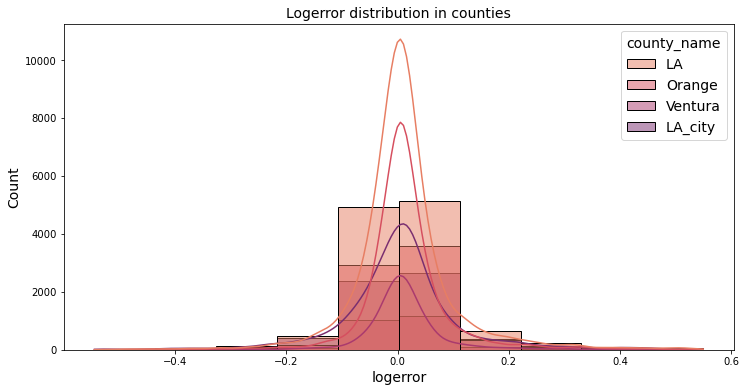

In [48]:
ev.viz_log_distribution(df)

The spread of the data and distributions look relatively similar. To confirm it we need to run the ANOVA statistical test to find out if there is a significal difference in the ```logerror``` among the counties.

$H_0:$ There is no significant difference in ```logerror``` means among different locations.

$H_a:$ There is significant difference in ```logerror``` means among different locations.

In [21]:
# move the test to evaluate module!!!!!

In [49]:
reload(ev)

<module 'src.evaluate' from '/Users/nadina/codeup-data-science/clustering-project/src/evaluate.py'>

In [50]:
ev.test_logerror_counties(df)

F-statistics: 10.228, p: 0.0


The p-value is lower that our significance level. 

We reject the null hypothesis. 

There is significant difference in ```logerror``` means among different locations.

##### 2. Is separation of the data by ```zip``` code different from the separation by county?

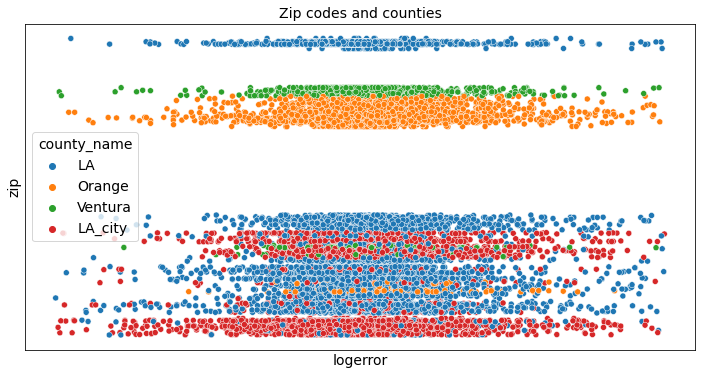

In [34]:
cl.viz_zip_counties(df)

We used a ```logerror``` as a continuous variable to create a scatter plot. The goal of this plot is to see if the  the ```zip``` code could provide us an appropriate data split in clustering or maybe some additional separations in the data. Unfotunately, we can observe that zip codes are not groupped by counties.  We can not use them to create our clusters.

##### 3. Can the latitude and longitude be used for clustering?

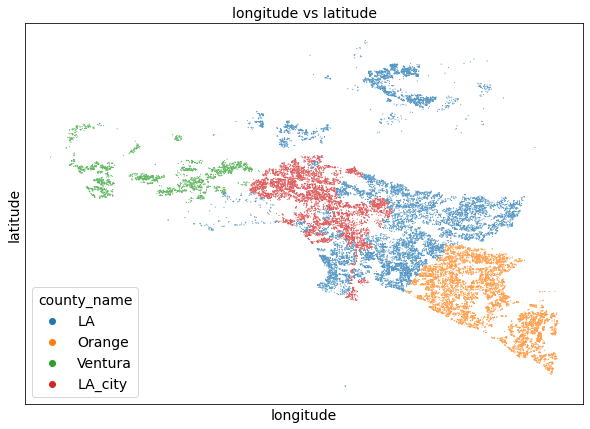

In [30]:
cl.visualize_map(df)

We can observe that ```latitude``` and ```longitude``` can potentially provide more valuable clusters, so we going to use them to create cluster groups and split the data based on them.

<h3 style="color:#009eff;">Peek at data</h3>

- Before we can determine which correlation test to use between Pearson and Spearman, we must see if the feature fits a plot against the target in a roughly linear manner
- Most of the features do not look clear, but an example of the obviously worst feature and a pretty good feature will be shown below:

##### 4. Are there variables that can be usefull in the prediction of the ```logerror```?

<Figure size 1440x1440 with 0 Axes>

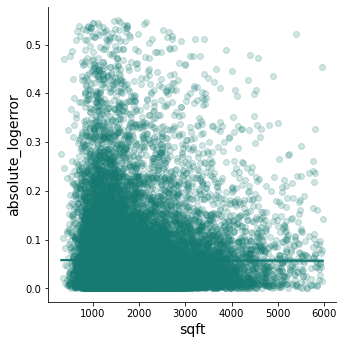

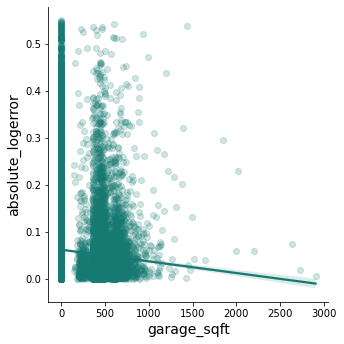

In [39]:
ev.correlation_plot(df)

Among all continuous values in our data set the best correlation on the graph shows ```garage_sqft```. But even this feature doesn't show the strong correlation. We need to run the Spearman’s R statistical test, to confirm that it can be used in our predicting models.

$H_0:$ There is no relationship between ```logerror``` and garage square footage.

$H_a:$ There is relationship between ```logerror``` and garage square footage.

In [43]:
ev.spearman_test(df, 'logerror', 'garage_sqft')

Spearman Correlation Coefficient of garage_sqft: 0.03633033967205546
P-value: 0.000


Despite the correlation coefficient being very low, the p-value is 0. It means that there is a relationship between the ```logerror``` and the ```garage_sqft```.

Before to jump into the clustering section of our project we'd like to run different statistical tests that will help us to identify which features we can use for predicting models.

In [44]:
#!!! visuals and data frame

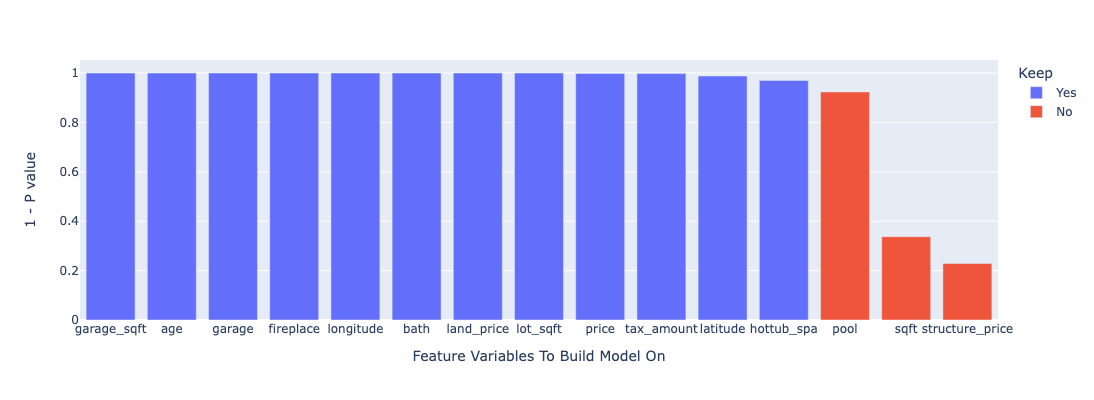

<Figure size 2000x2000 with 0 Axes>

In [19]:
ev.correlation_viz()

### Exploration Takeaways
- There is a significant difference in means among different locations. Splitting data based on location might be a good idea.
- ```zip``` codes can not provide us with the information that can potentially be usefull in the clustering or modeling
- ```latitude``` and ```longitude``` are potentially good variables for clustering.
- Continious features don't show much correlation with our target variable. 


<h3 style="color:#009eff;">Clustering</h3> 

We created two types of cluster groups. One is based on the location and the second one uses numerical categories for clustering. To find the optimal number of clusters we used ```inertia_``` attribute from ```KMeans``` class of ```sklearn``` library and applied it to so-called Elbow method to visualize the *sum of squared distances* inside the clusters.

As the result we created:
- six clusters based on the location
- seven clusters based on the numerical features.

The clustering result you can see below.

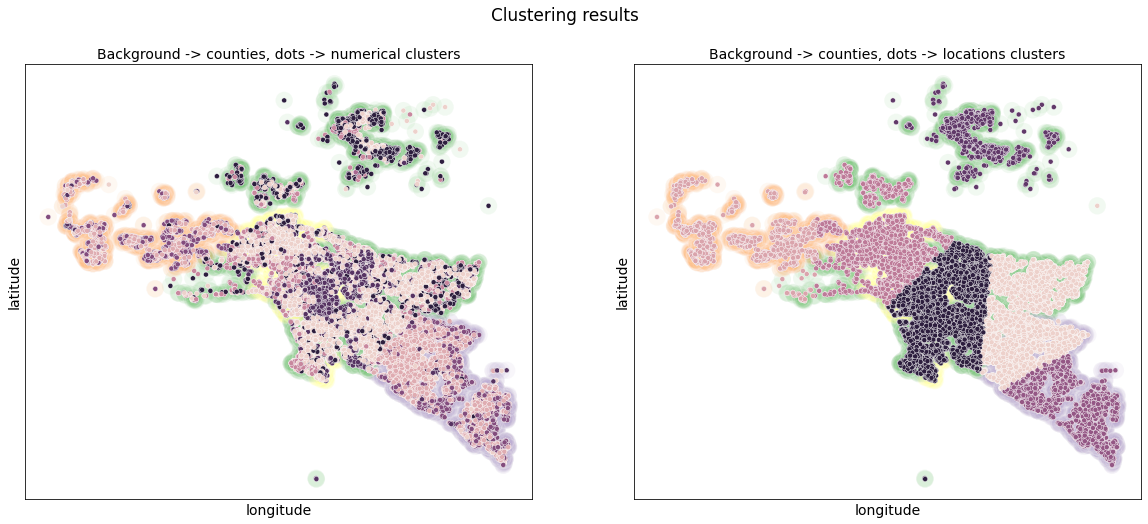

In [45]:
cl.viz_clustering_results()

We are going to create seapate models based on those clusters.

<h3 style="color:#009eff;">Modeling</h3> 

#### Data pre-processing

To prepare the data set for modeling we:

- digitized the categorical data
- removed the features that are not useful for predictions (see the table below)
- separeted the target variable from the train, validate and test data sets.

**Features that I won't use to the create models**

|Feature|The reason|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*year_built*|correlated with ```house_age```


**Features that I will use to create the models**

All other features will go into the train, validate and test data sets. 

**How we create models**

We use five different regressors
- Multiple Linear Regressions with default hyperparameters
- Lasso Lars algorithm with ```alpha=0.1```
- Gradient Boosting Regressor with default hyperparameters
- Decision Tree Regressor with ```max_depth=4```
- Random Forest Regressor with ```max_depth=4```

We have three iterations of modeling. The first one predicts on the whole data set. The second iteration breaks the data based on the clusters. The third iteration breaks the data based on the county. We visually observe the results of the train and validation sets, the run the model we pick on the test set.

The values of the target variable are very slow [-0.55, 0.55]. That's why for the model evaluation we picked the Adjusted $R^2$ score.

The baseline of the models is the ```mean of the logerror = 0.011```

#### Modeling summary
- All models suck

<h3 style="color:#009eff;">Next steps and recommendations</h3>
It would help to have and access to unscaled and not logarithmic transformed error. As it is impossible we would suggest to split the data based on underestimate and overestimate ```logerror```.